<a href="https://colab.research.google.com/github/Anushka091922/Integrating-ML-and-Astronomy/blob/main/Using_ML_for_astronomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Clustering
import numpy as np
import matplotlib.pyplot as plt
# matplotlib inline

In [3]:
from sklearn import datasets
iris=datasets.load_iris()
# for loading the iris toy data
iris.target_names
# type of the irises

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
print(iris.feature_names)
print("\n Shape is",iris.data.shape)
print(iris.data[:10])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 Shape is (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [5]:
# the next is the k-means clustering
from sklearn.cluster import KMeans


In [6]:
Kcluster=KMeans(n_clusters=2,init="k-means++",n_init=20,random_state=5)
# here initialializing the Kmeans with the 2 clusters
Kcluster.fit(iris.data)
Klabels=Kcluster.labels_
centroids=Kcluster.cluster_centers_
# for the centroids of the determined clusters


Text(0, 0.5, 'sepal width')

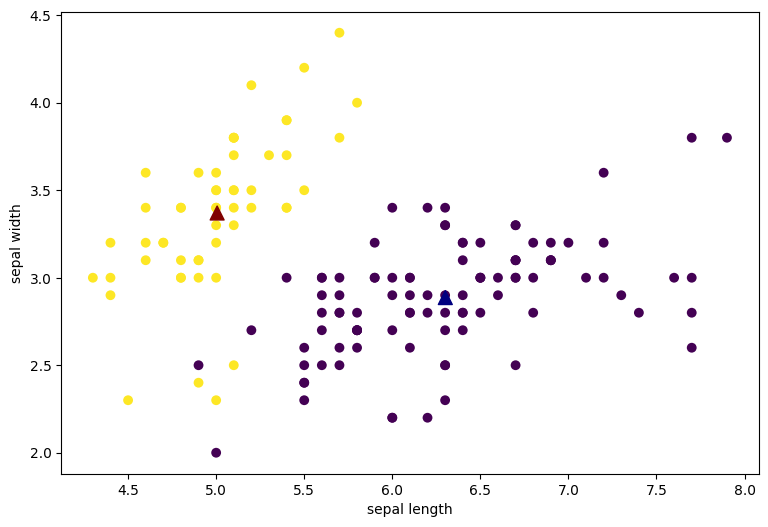

In [8]:
plt.figure(figsize=(9,6))
plt.scatter(iris.data[:,0],iris.data[:,1],c=Klabels,s=50,edgecolor="None",cmap="viridis")
plt.scatter(centroids[:,0],centroids[:,1],c=[0,1],marker='^',s=100,cmap="jet")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0, 0.5, 'sepal width')

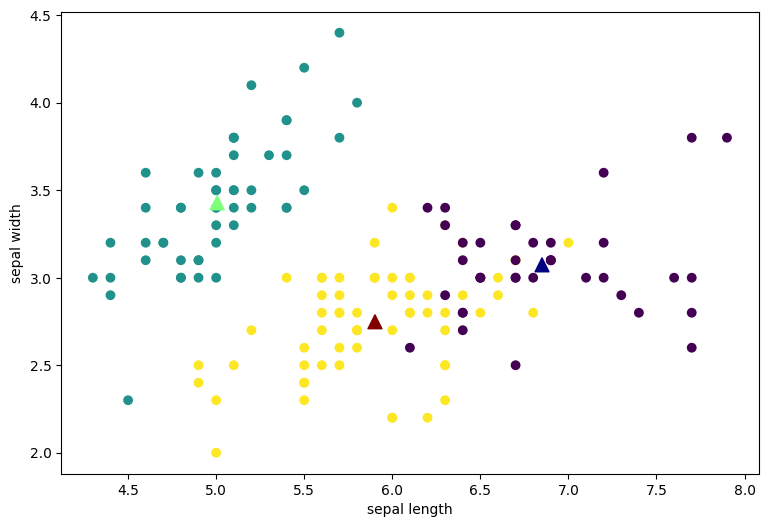

In [10]:
# now by using three clusters
Kcluster3=KMeans(n_clusters=3,init="k-means++",n_init=20)
Kcluster3.fit(iris.data)
Klabels3=Kcluster3.labels_
centroids3=Kcluster3.cluster_centers_
plt.figure(figsize=(9,6))
plt.scatter(iris.data[:,0],iris.data[:,1],c=Klabels3,s=50,edgecolor="None",cmap="viridis")
plt.scatter(centroids3[:,0],centroids3[:,1],c=[0,1,2],marker='^',s=100,cmap="jet")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [13]:
print("feature\t\t\tmean\tstd\tmin\tmax")
for featnum, feat in enumerate(iris.feature_names):
    print("{:s}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}".format(
        feat, np.mean(iris.data[:, featnum]),
        np.std(iris.data[:, featnum]), np.min(iris.data[:, featnum]),
        np.max(iris.data[:, featnum])))

print("\nPetal length has a higher range and so will have a stronger effect on the clustering")


feature			mean	std	min	max
sepal length (cm)	5.84	0.83	4.30	7.90
sepal width (cm)	3.06	0.43	2.00	4.40
petal length (cm)	3.76	1.76	1.00	6.90
petal width (cm)	1.20	0.76	0.10	2.50

Petal length has a higher range and so will have a stronger effect on the clustering


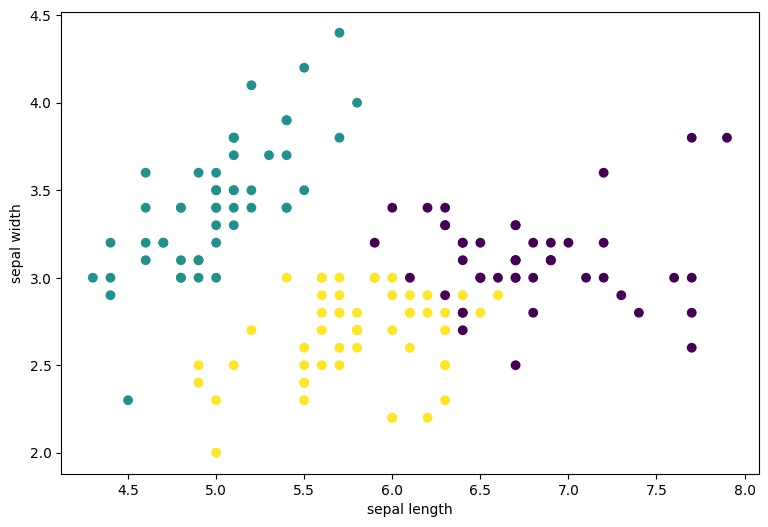

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler().fit(iris.data)
Kcluster3 = KMeans(n_clusters=3, n_init=20)
Kcluster3.fit(scaler.transform(iris.data))  # perform clustering on the scaled data

plt.figure(figsize=(9, 6))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=Kcluster3.labels_, s=50, edgecolor="None", cmap="viridis")

plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()








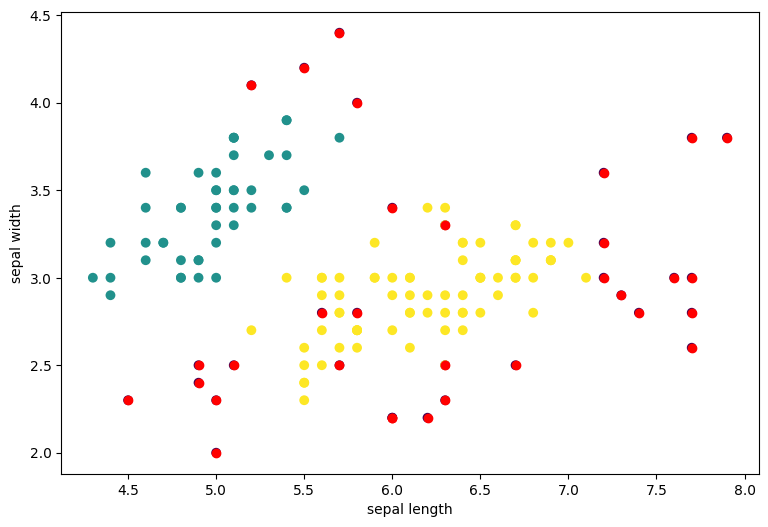

In [21]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

dbs = DBSCAN(eps=0.6, min_samples=7)
dbs.fit(scaler.transform(iris.data))  # best to use re-scaled data since eps is in absolute units

dbs_outliers = dbs.labels_ == -1

plt.figure(figsize=(9, 6))
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=dbs.labels_, s=50, edgecolor="None", cmap="viridis")
plt.scatter(iris.data[dbs_outliers, 0], iris.data[dbs_outliers, 1], s=36, c='r')  # Corrected the indexing
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

In [24]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving santos_short.csv to santos_short.csv


In [26]:
import pandas as pd
#load data of planet properties from the paper.
dt=pd.read_csv("santos_short.csv",sep=",", header=None, names=["vmag", "Teff","logg","sma","feh","msun",
                                                              "mpl","P","e"] ) .dropna()

#condition according to Santos et al 2017
dt2=dt[(dt["mpl"]>=1) & (dt["mpl"]<15) & (dt["vmag"] <13) & (dt["Teff"] >= 4000) & (dt["Teff"] <= 6500) &
      (dt["P"]>=10) & (dt["P"]<365*5)]
dt2


,vmag,Teff,logg,sma,feh,msun,mpl,P,e
1,5.02,4255.0,1.80,1.54,-0.13,3.40,10.50,516.22,0.08
2,5.22,4709.0,2.44,0.83,-0.29,2.38,5.33,185.84,0
3,6.67,5311.0,4.42,2.77,0.43,0.95,4.64,1773.40,0.37
4,6.20,5772.0,4.40,1.68,0.08,1.00,1.68,799.50,0.69
5,5.52,5076.0,3.08,2.60,0.00,2.33,10.30,993.30,0.08
...,...,...,...,...,...,...,...,...,...
3202,4.09,6212.0,4.26,0.86,0.13,1.25,9.10,240.94,0.24
3236,11.10,5625.0,4.40,0.10,0.26,1.08,1.23,11.55,0
3276,11.60,5546.0,4.53,1.07,0.06,0.90,3.18,421.00,0.29
3283,11.90,5576.0,4.28,1.41,0.36,1.07,1.31,596.00,0.28


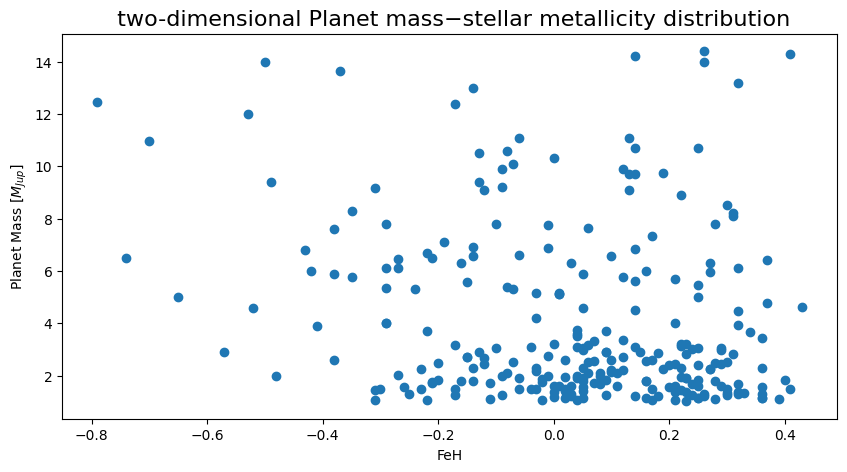

In [27]:
plt.figure(figsize=(10,5))

plt.scatter(dt2["feh"],dt2["mpl"])
plt.xlabel('FeH')
plt.ylabel('Planet Mass [$M_{Jup}$]')
plt.title(" two-dimensional Planet mass−stellar metallicity distribution", fontsize=16);

In [28]:
feh_Mpl = dt2.filter(items=["feh","mpl"])

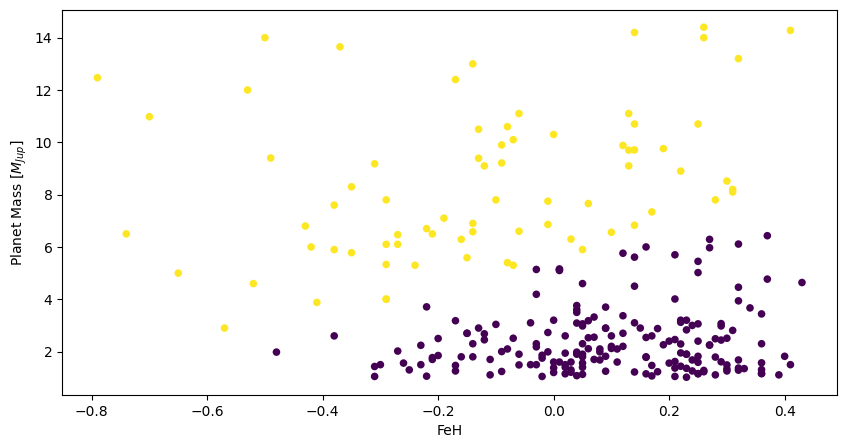

In [29]:
scaler_p = StandardScaler().fit(feh_Mpl)

planet_cluster = KMeans(n_clusters = 2, n_init = 100)
planet_cluster.fit(scaler_p.transform(feh_Mpl))   #perform clustering on the scaled data


plt.figure(figsize=(10,5))
plt.scatter(feh_Mpl["feh"], feh_Mpl["mpl"], c = planet_cluster.labels_, s = 30, edgecolor = "None", cmap = "viridis");

plt.xlabel('FeH')
plt.ylabel('Planet Mass [$M_{Jup}$]');

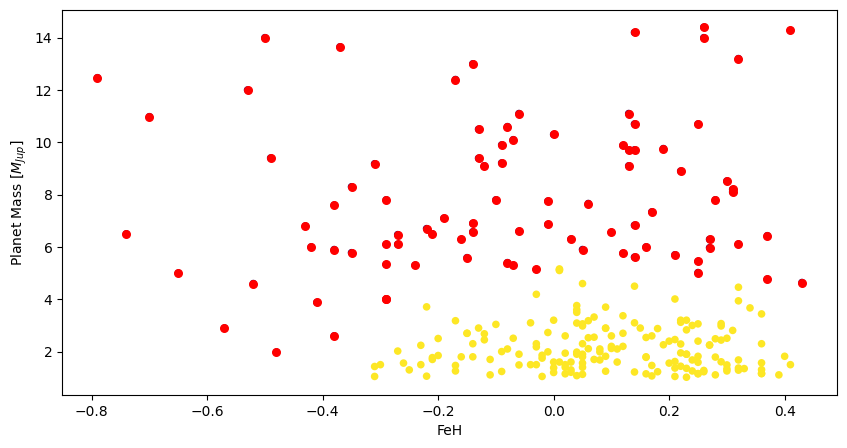

In [30]:
dbs = DBSCAN(eps = 0.5, min_samples = 25)
dbs.fit(scaler_p.transform(feh_Mpl))

dbs_outliers = dbs.labels_ == -1

plt.figure(figsize=(10,5))
plt.scatter(feh_Mpl["feh"], feh_Mpl["mpl"], c = dbs.labels_, s = 30, edgecolor = "None", cmap = "viridis")
plt.scatter(feh_Mpl["feh"][dbs_outliers], feh_Mpl["mpl"][dbs_outliers], s = 30, c = 'r')

plt.xlabel('FeH')
plt.ylabel('Planet Mass [$M_{Jup}$]');

In [ ]:
# Gaussian Mixture Models:
# attempts to find a mixture of Gaussian probability distributions of multi-dimensional that can best model the input dataset. It is can be used for clustering similar to Kmeans but more flexible in the sense that the cluster models are not necessarily circular around the centroids.

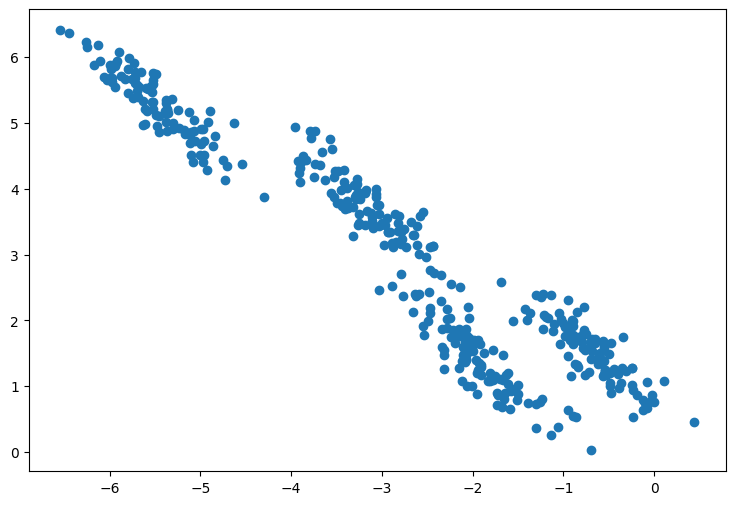

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1]  # flip axes for better plotting
rng = np.random.RandomState(13)
sim_data = np.dot(X, rng.randn(2, 2))

plt.figure(figsize=(9, 6))
plt.plot(sim_data[:, 0], sim_data[:, 1], "o")

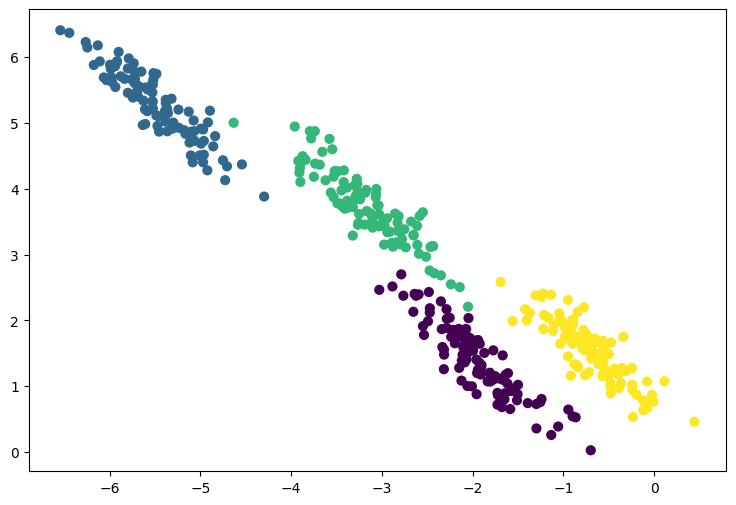

In [35]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=4).fit(sim_data)
labels = gmm.predict(sim_data)

plt.figure(figsize=(9,6))
plt.scatter(sim_data[:, 0], sim_data[:, 1], c=labels, s=40, cmap='viridis');

In [36]:
proba=gmm.predict_proba(sim_data)
proba.round(2)


array([[0.  , 0.43, 0.57, 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , 1.  ],
       [0.45, 0.  , 0.55, 0.  ],
       [0.  , 0.  , 0.  , 1.  ]])

In [38]:
#Trying GMM to find the clusters in the SDSS data
!pip install astroquery


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 24.5 MB/s eta 0:00:00


In [39]:
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database

GALquery = """SELECT TOP 10000
             p.dered_u - p.dered_g as ug, p.dered_g - p.dered_r as gr,
             p.dered_g - p.dered_i as gi, p.dered_g - p.dered_z as gz,
             p.petroRad_i, p.petroR50_i, p.deVAB_i
             FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
             WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND p.type = 3
               """
SDSSgals = SDSS.query_sql(GALquery)
SDSSgals


ug,gr,gi,gz,petroRad_i,petroR50_i,deVAB_i
float64,float64,float64,float64,float64,float64,float64
1.141483,0.4558334,0.7649918,0.9966469,4.494645,2.194148,0.2800752
1.485077,0.4822731,0.703167,0.8503208,16.94279,6.597528,0.7863275
3.510567,1.372873,2.416731,2.980183,2.800704,1.157151,0.7013642
1.213171,1.46801,2.283123,2.831318,2.912472,1.294909,0.2635514
1.066206,1.155075,1.859955,2.054472,2.907197,1.237368,0.6729143
0.4414177,1.528801,2.345135,2.534,2.810926,1.302124,0.8997472
1.425522,1.563675,2.35099,2.894314,2.497223,1.155031,0.4120486
1.752718,1.48971,2.340343,2.692739,3.533957,1.516037,0.8425648
2.389563,1.392305,2.538416,3.084955,3.855324,1.50367,0.9999491


(-1.0, 6.0)

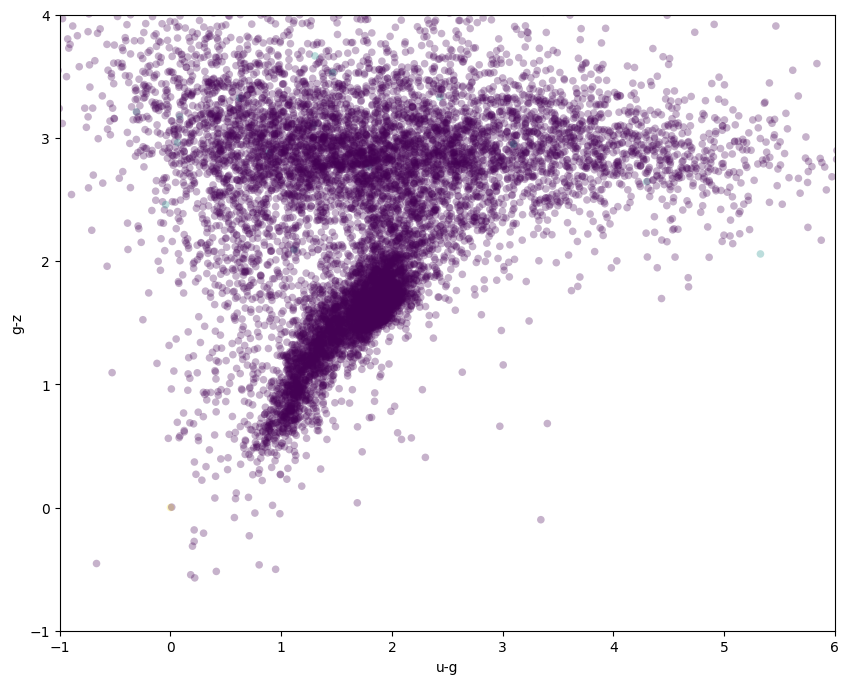

In [40]:
Xgal = np.array(SDSSgals.to_pandas())
#galScaler = StandardScaler().fit(Xgal)

gal_gmm = GMM(n_components=3,covariance_type='full',max_iter=500, n_init=100).fit(Xgal)
labels = gal_gmm.predict(Xgal)


plt.figure(figsize = (10,8))
plt.scatter(Xgal[:,0], Xgal[:,3], c= labels, s = 30, edgecolor = "None", cmap = "viridis",alpha=0.3)
#plt.scatter(centroids[:, 0], centroids[:, 1], c=[0,1,2], marker='^', s=100, cmap="jet")
plt.xlabel("u-g")
plt.ylabel("g-z")
plt.ylim([-1,4])
plt.xlim([-1,6])

Text(0, 0.5, 'y')

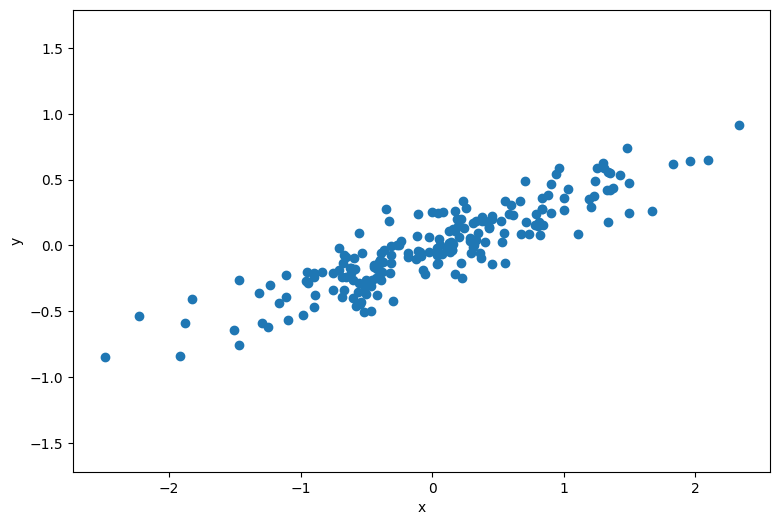

In [41]:
# Dimensionality Reduction
# Principle Component Analysis (PCA):
# can be used to perform dimensionality reduction of data to project it to a lower dimensional space while keeping the maximum variance in the dataset.

# let's see an example in 2 dimension
rng = np.random.RandomState(1)
XY = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.figure(figsize=(9,6))
plt.scatter(XY[:, 0], XY[:, 1])
plt.axis('equal');
plt.xlabel("x")
plt.ylabel("y")

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(XY)

variance = pca.explained_variance_
print( "variance in the components: \n", variance)

# extract the components
components = pca.components_
print( "components(): \n", components)

pca_mean = pca.mean_
print( "mean: \n", pca_mean)

variance in the components: 
 [0.7625315 0.0184779]
components(): 
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
mean: 
 [ 0.03351168 -0.00408072]


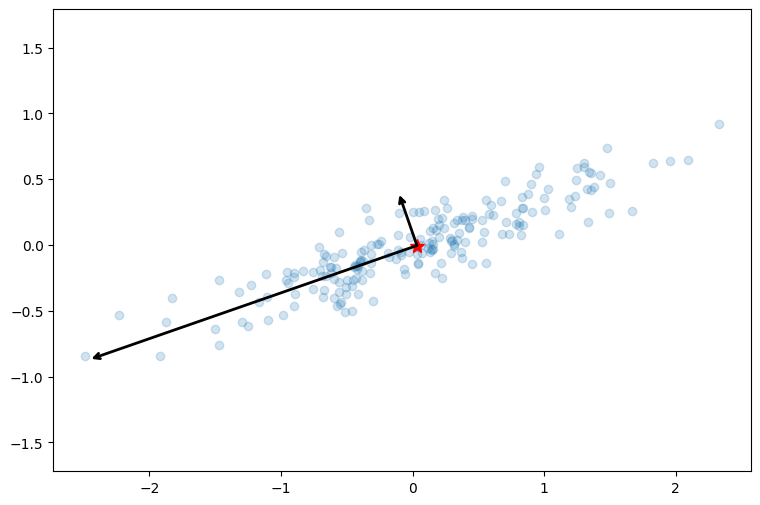

In [43]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(9,6))
plt.scatter(XY[:, 0], XY[:, 1], alpha=0.2)
for length, vector in zip(variance, components):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca_mean, pca_mean + v)
plt.axis('equal');
plt.plot(pca_mean[0], pca_mean[1],"r*",ms=10)

In [44]:
# The components define the direction of the vector and the variance is the square of the vector length in each axis. These vectors are the principal components of the data with the length indicating the signifance in describing the data.

# For dimensionality reduction, the smallest principal components are removed therefore lowering the dimension of the data while preserving the greatest variance that can describe the data.
# Let's reduce the dimension of this data from 2 to 1.

pca = PCA(n_components=1)
pca.fit(XY)
XY_pca = pca.transform(XY)
print("original shape:   ", XY.shape)
print("reduced shape:", XY_pca.shape)

original shape:    (200, 2)
reduced shape: (200, 1)


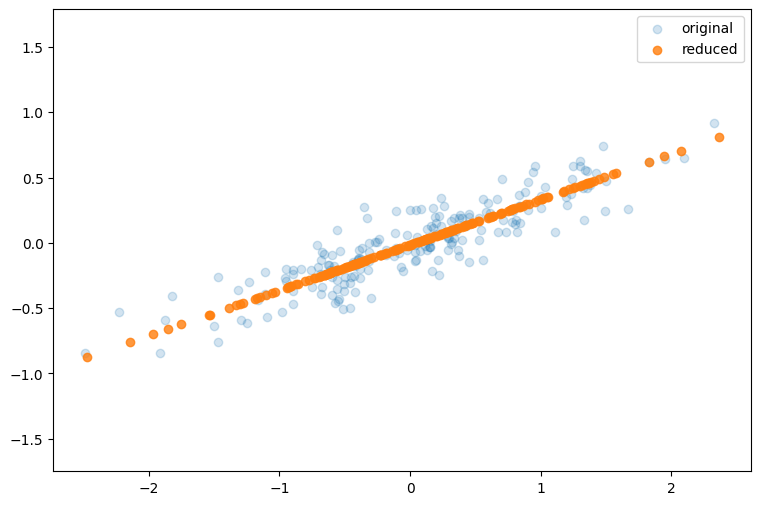

In [45]:
XY_reduced = pca.inverse_transform(XY_pca)
plt.figure(figsize=(9,6))

plt.scatter(XY[:, 0], XY[:, 1], alpha=0.2, label="original")
plt.scatter(XY_reduced[:, 0], XY_reduced[:, 1], alpha=0.8, label="reduced")
plt.axis('equal');
plt.legend()

In [47]:
# t-Distributed Stochastic Neighbor Embedding (t SNE):
# non-linear dimensionality reduction technique that embeds high-dimensional data in a low dimensional space (2 - 3D). It is useful for visualizing complex datasets.

# similar objects are represented by nearby points, whereas dissimilar objects are represented by distant points, with a high probability

# assign distances between the objects in the sample (euclidean)
# constructs a probability distribution over pairs of high-D objects with a scale term (perplexity) which determines how large the neighborhood of each object is.
# embeds the high-dimensional objects into a low dimensional space, such that the probability distribution


from google.colab import files

# Upload the FITS files
uploaded_files = files.upload()

Saving Mch1.30Zp0.06T04.0000_iTp0.00_baseFe_linear_FWHM_2.51.fits to Mch1.30Zp0.06T04.0000_iTp0.00_baseFe_linear_FWHM_2.51.fits


In [53]:
from google.colab import files

# Upload the FITS files
uploaded_files = files.upload()

Saving Mch1.30Zp0.06T00.3000_iTp0.00_baseFe_linear_FWHM_2.51.fits to Mch1.30Zp0.06T00.3000_iTp0.00_baseFe_linear_FWHM_2.51.fits
Saving Mch1.30Zp0.06T04.0000_iTp0.00_baseFe_linear_FWHM_2.51.fits to Mch1.30Zp0.06T04.0000_iTp0.00_baseFe_linear_FWHM_2.51 (1).fits


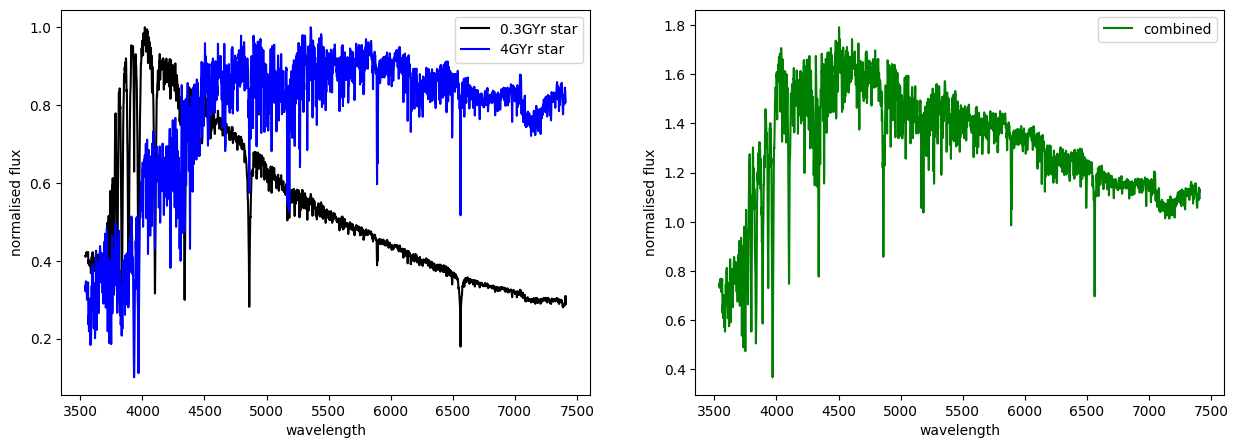

In [55]:
from astropy.io import fits
wavelength = np.arange(3540.5, 7409.6 + 0.9, 0.9)

# stellar spectra from Baron 2019
h1 = fits.open("Mch1.30Zp0.06T00.3000_iTp0.00_baseFe_linear_FWHM_2.51.fits")   #0.3GYr star
spectrum1 = h1[0].data
spectrum1=spectrum1/np.max(spectrum1)

path2 = "Mch1.30Zp0.06T04.0000_iTp0.00_baseFe_linear_FWHM_2.51.fits"    #4Gyr star
h2 = fits.open(path2)
spectrum2 = h2[0].data
spectrum2 = spectrum2/np.max(spectrum2)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(wavelength, spectrum1, "k",label="0.3GYr star")
plt.plot(wavelength, spectrum2, "b", label="4GYr star")
plt.xlabel("wavelength")
plt.ylabel("normalised flux")
plt.legend()

plt.subplot(1,2,2)
plt.plot(wavelength, spectrum1+spectrum2, "g",label="combined")
plt.xlabel("wavelength")
plt.ylabel("normalised flux")
plt.legend()

In [56]:
def return_data_mixed_stars(N_obj):
    """
    function returns spectra which are a combination of two stellar spectra, with different weights
    in this function, the weights will sum up to 1
    """
    weights = np.linspace(0, 1, N_obj)

    spectra_list = []
    for i in range(N_obj):
        combined_spec = spectrum1 * weights[i] + spectrum2 * (1 - weights[i])
        spectra_list.append(combined_spec)
    spectra_list = np.array(spectra_list)
    return spectra_list

Each spectrum has 4300 flux values, and therefore 4300 features ordered by age. Purple represents old stellar population


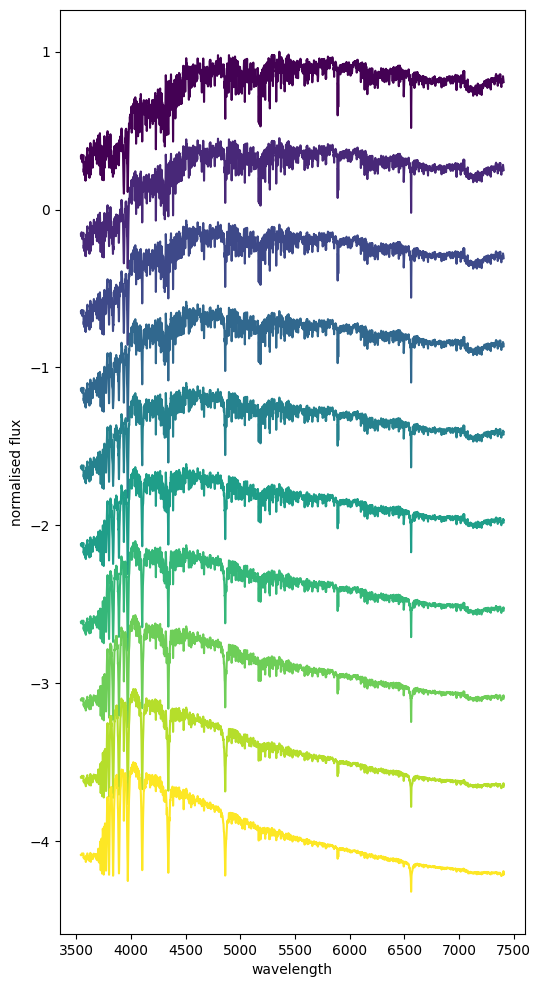

In [58]:
# create N spectra to play with, and plot them
import matplotlib as mpl
import matplotlib.cm as cm

N_obj = 10
spectra_list = return_data_mixed_stars(N_obj)
index = np.arange(N_obj)

# now plot them according to their index
norm = mpl.colors.Normalize(vmin=index[0], vmax=index[-1])
cmap = cm.viridis
m = cm.ScalarMappable(norm=norm, cmap=cmap)

plt.figure(figsize=(6, 12))

for i in range(N_obj):
    plt.plot(wavelength, spectra_list[i] - 0.5*i, color=m.to_rgba(i))

plt.xlabel("wavelength")
plt.ylabel("normalised flux");
print("Each spectrum has 4300 flux values, and therefore 4300 features ordered by age. Purple represents old stellar population" )

(100, 4300)
(100, 2)


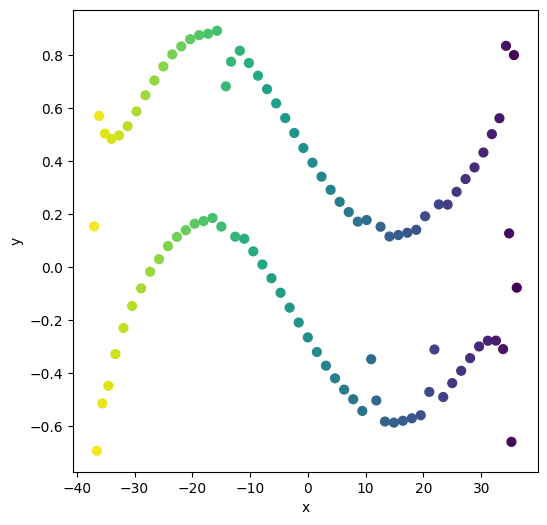

In [59]:
# now, we will increase the sample to 100 objects, and examine the output of tSNE
from sklearn.manifold import TSNE

N_obj = 100
spectra_list = return_data_mixed_stars(N_obj)
print(spectra_list.shape)
indices = np.arange(N_obj)

result = TSNE(perplexity=10.0, learning_rate=20.0, metric='euclidean', n_components=2).fit_transform(spectra_list)
print( result.shape)

x = result[:, 0]
y = result[:, 1]

plt.rcParams['figure.figsize'] = 6, 6
plt.scatter(x, y, c=indices, s=40)
plt.xlabel("x")
plt.ylabel("y");

In [60]:
spectra_list.shape

(100, 4300)

In [61]:
# Supervised learning Algorithms
import seaborn as sns
from astroquery.sdss import SDSS  # enables direct queries to the SDSS database


STAR_GALquery = """SELECT TOP 20000
                p.psfMag_r, p.fiberMag_r, p.fiber2Mag_r, p.petroMag_r,
                p.deVMag_r, p.expMag_r, p.modelMag_r, p.cModelMag_r,
                s.class
                FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
                WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1 AND s.class != 'QSO'
                ORDER BY p.objid ASC"""

stars_gals = SDSS.query_sql(STAR_GALquery)
stars_gals["class"]=np.array(stars_gals["class"], dtype=np.str)
stars_gals

/usr/local/lib/python3.10/dist-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
<ipython-input-61-60ebd80b15b2>:15: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  stars_gals["class"]=np.array(stars_gals["class"], dtype=np.str)


psfMag_r,fiberMag_r,fiber2Mag_r,petroMag_r,deVMag_r,expMag_r,modelMag_r,cModelMag_r,class
float64,float64,float64,float64,float64,float64,float64,float64,str6
18.50914,18.6587,19.34104,17.55135,17.32121,17.58728,17.58728,17.4931,GALAXY
19.03946,19.33727,19.82178,19.07113,19.04754,19.04397,19.04397,19.04397,STAR
19.89376,19.79181,20.47909,19.36626,19.19926,19.36779,19.36779,19.25845,GALAXY
22.04833,22.07411,22.69651,21.53075,21.04837,21.33033,21.33033,21.33033,GALAXY
21.57319,21.57904,22.22763,20.46425,19.93905,20.40421,20.40414,20.20997,GALAXY
18.67408,18.75905,19.37388,17.83968,17.70064,17.9051,17.70065,17.75864,GALAXY
20.19664,20.34542,20.9382,19.78261,19.64053,19.75468,19.75467,19.75468,GALAXY
19.42215,19.38944,20.16081,17.68282,17.1741,17.64558,17.64557,17.64558,GALAXY
18.89474,18.91774,19.5801,17.33765,17.03491,17.44135,17.03493,17.06851,GALAXY


In [62]:
#convert to pandas dataframe
sdss_df=stars_gals.to_pandas()

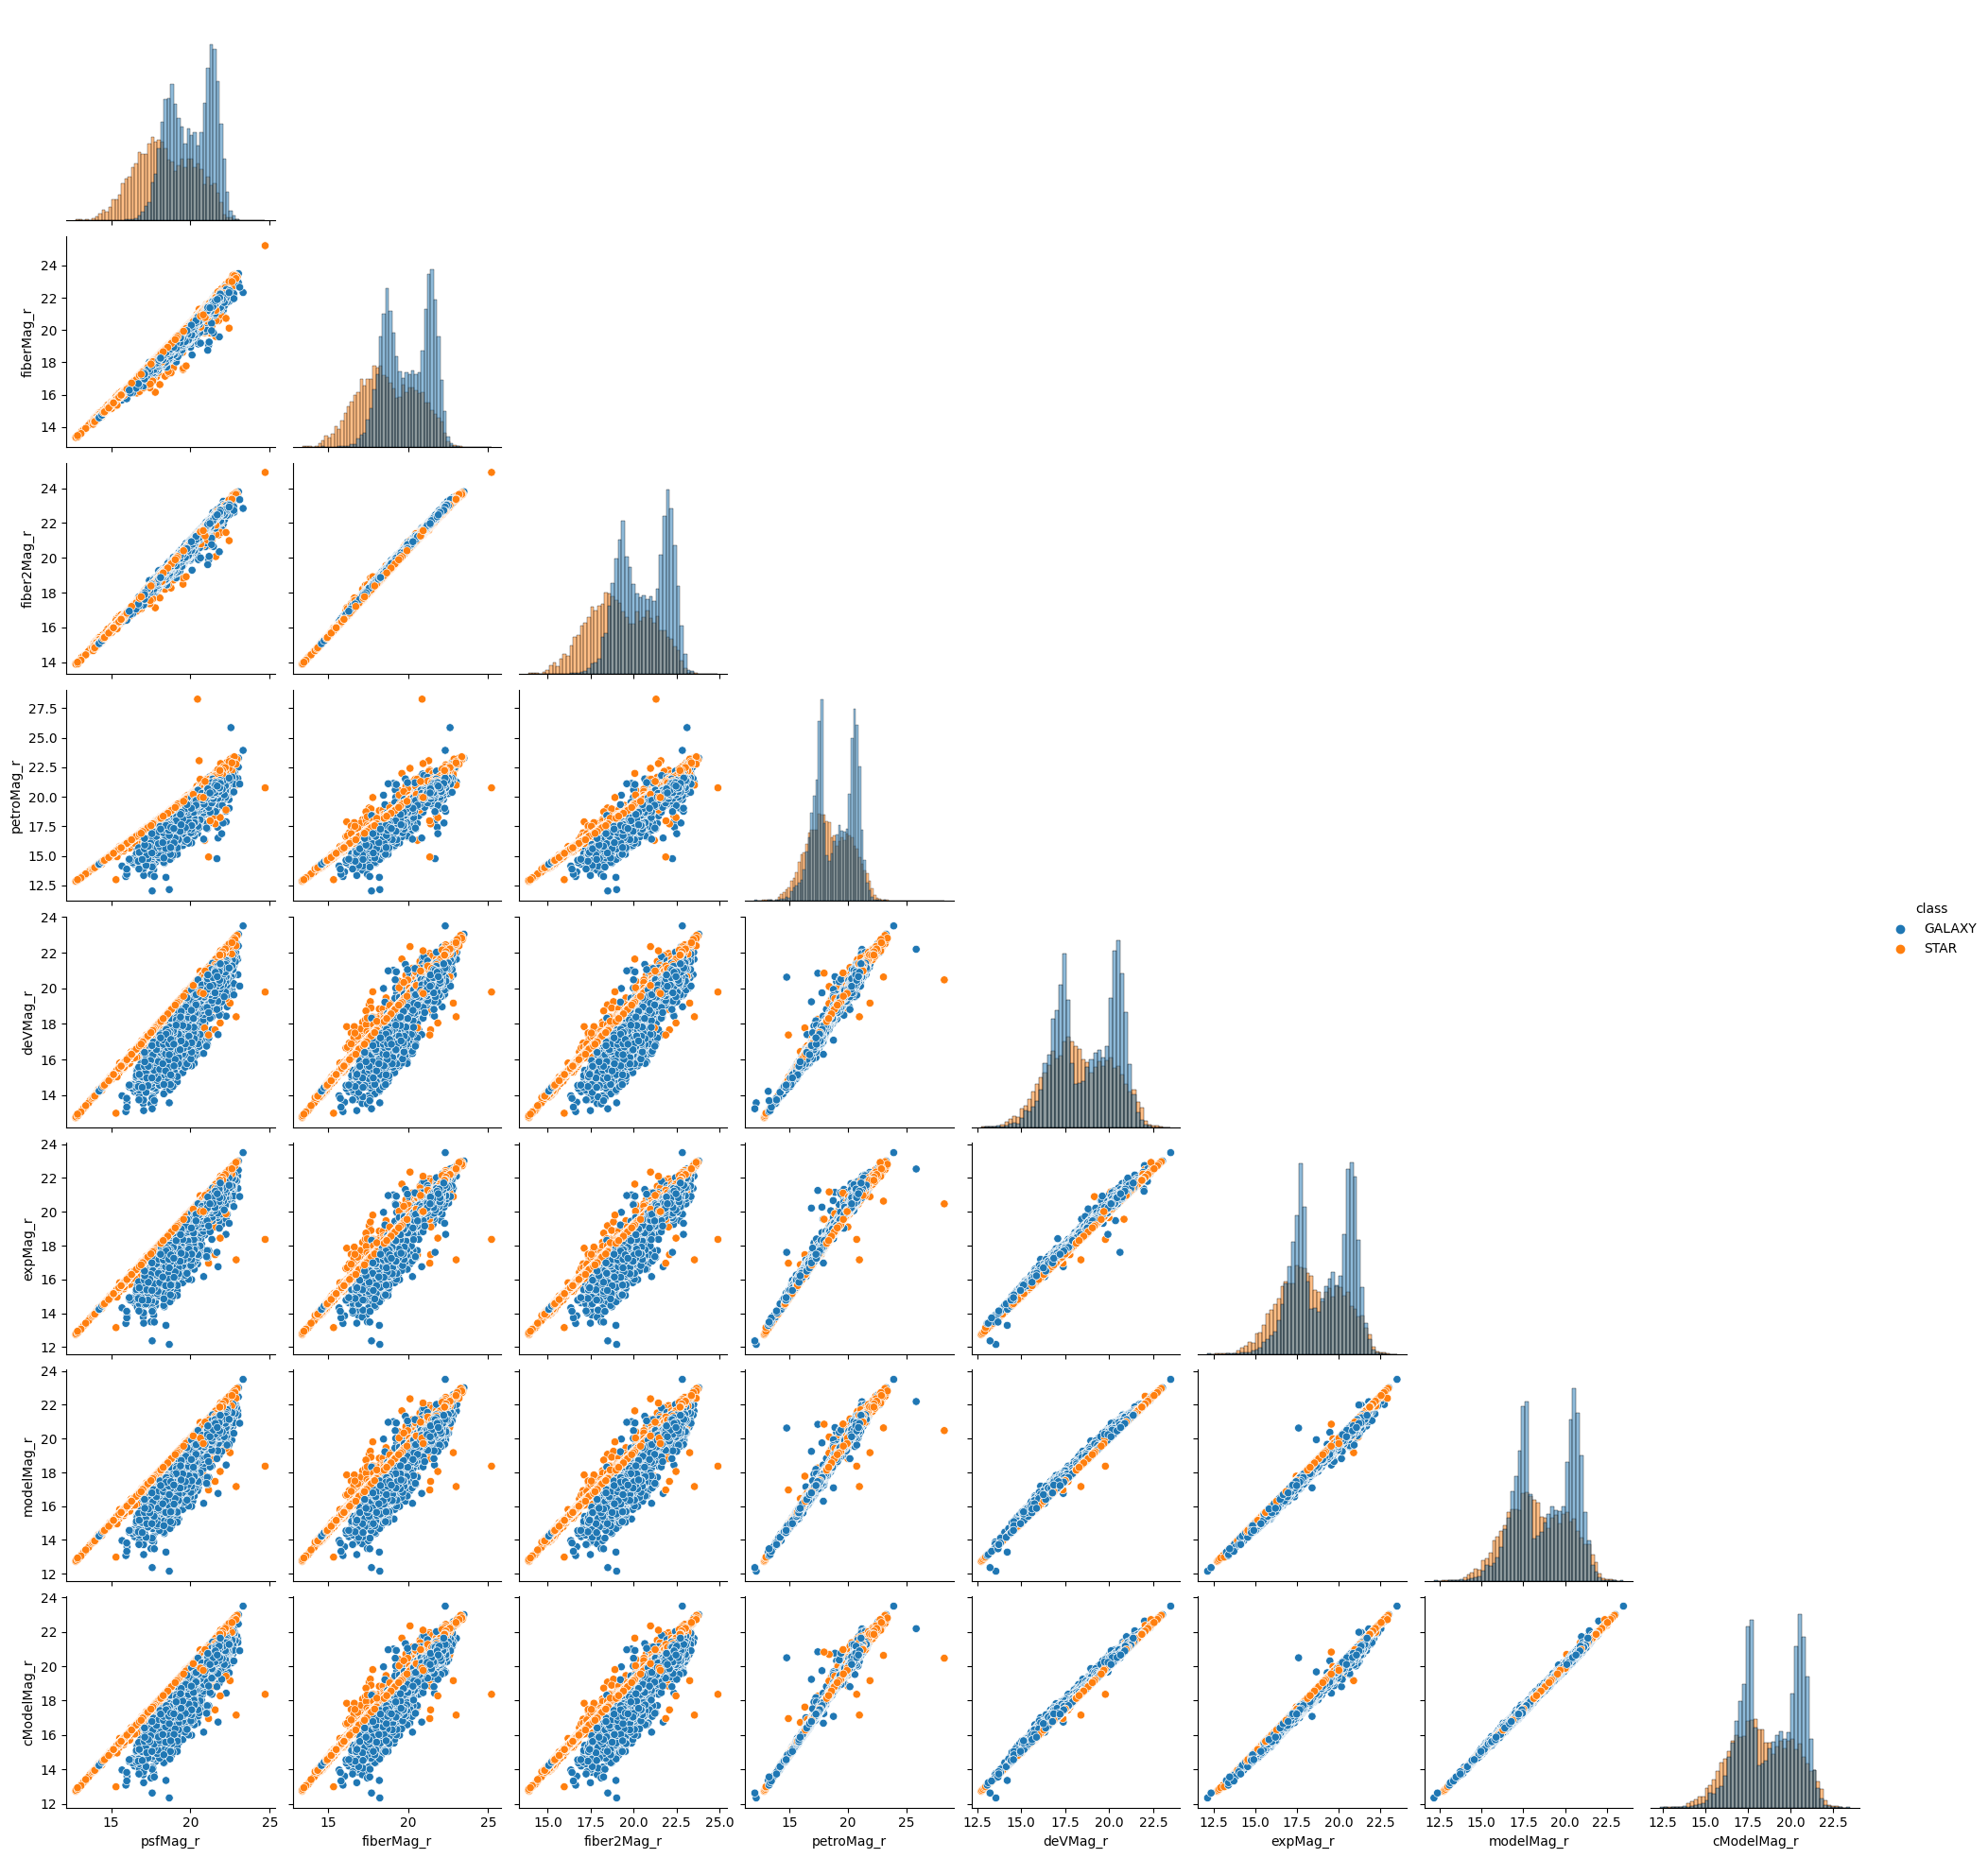

In [63]:
sns.pairplot(sdss_df, hue = 'class', diag_kind = 'hist', corner=True)

In [64]:
from sklearn.model_selection import train_test_split
rs = 1851

feats = list(sdss_df.columns)
feats.remove('class')

X = np.array(sdss_df[feats])                       #features
y = np.array(sdss_df['class'], dtype=np.str)       #target labels

#split the data into training set (70%) and test set(30%)
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.3, random_state = rs)

<ipython-input-64-34e7a9a45ae9>:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.array(sdss_df['class'], dtype=np.str)       #target labels


In [65]:
# Let's train a
# KNN model on the training set and evaluate its performance on previously unseen data in the test set

from sklearn.neighbors import KNeighborsClassifier

knn_clf25 = KNeighborsClassifier(n_neighbors=25)
knn_clf25.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=25)

In [66]:
from sklearn.metrics import accuracy_score

knn25_train_preds = knn_clf25.predict(train_X)
#compare the prediction to the actual target label in training set
print("knn25 Training accuracy = {:.4f}".format(accuracy_score(train_y, knn25_train_preds)))

knn25 Training accuracy = 0.9699


In [67]:
from sklearn.model_selection import cross_val_score

knn25_cv = cross_val_score(knn_clf25, train_X, train_y, cv=10)
#cross validation runs the model on 10 random subsets of the data and evaluates the accuracy of each subset.
#we can then take the mean of the accuracy scores of each subset

print(knn25_cv)
print('\n The kNN model accuracy = {:.4f} +/- {:.4f}'.format(np.mean(knn25_cv), np.std(knn25_cv, ddof=1)))

[0.97357143 0.95928571 0.96642857 0.96857143 0.96714286 0.97214286
 0.97571429 0.97357143 0.96857143 0.96785714]

 The kNN model accuracy = 0.9693 +/- 0.0047


In [68]:
for k in [1,10,25,100]:
    knn_cv = cross_val_score(KNeighborsClassifier(n_neighbors=k), train_X, train_y, cv=10)

    print('With k = {:d}, the kNN accuracy = {:.4f} +/- {:.4f}'.format(k, np.mean(knn_cv), np.std(knn_cv, ddof=1)))

With k = 1, the kNN accuracy = 0.9563 +/- 0.0039
With k = 10, the kNN accuracy = 0.9693 +/- 0.0049
With k = 25, the kNN accuracy = 0.9693 +/- 0.0047
With k = 100, the kNN accuracy = 0.9664 +/- 0.0051


In [69]:
knn25_test_preds = knn_clf25.predict(test_X)

#compare the test prediction to the actual target label in test set (test_y)
print("knn25 accuracy on test set = {:.4f}".format(accuracy_score(test_y, knn25_test_preds)))

knn25 accuracy on test set = 0.9713


In [70]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_y, knn25_test_preds))
print("\nTotal sources in test set is composed of {0} galaxies and {1} stars = {2} sources,"
      .format(sum(test_y == "GALAXY"),sum(test_y == "STAR") ,len(test_y)))

[[3330  102]
 [  70 2498]]

Total sources in test set is composed of 3432 galaxies and 2568 stars = 6000 sources,


In [71]:
# Let's use an RF model to classify sources in the SDSS data as done previously

from sklearn.ensemble import RandomForestClassifier

rf_clf50 = RandomForestClassifier(n_estimators=50, random_state=rs, n_jobs=-1)
rf_clf50.fit(train_X, train_y)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=1851)

In [72]:
feat_str = ',\n'.join(['{}'.format(feat) for feat in np.array(feats)[np.argsort(rf_clf50.feature_importances_)[::-1]]])

print('From most to least important: \n{}'.format(feat_str))

From most to least important: 
psfMag_r,
fiber2Mag_r,
fiberMag_r,
deVMag_r,
cModelMag_r,
modelMag_r,
petroMag_r,
expMag_r


In [73]:
rf50_train_preds = rf_clf50.predict(train_X)
#compare the prediction to the actual target label in training set
print("rf50 Training accuracy = {:.4f}".format(accuracy_score(train_y, rf50_train_preds)))

rf50 Training accuracy = 0.9995


In [74]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score  # Add this import

# Assuming you have defined train_X and train_y

rs = 42  # Set your random seed as needed

for ntree in [20, 50, 100, 300]:
    rf_cv = cross_val_score(RandomForestClassifier(n_estimators=ntree, random_state=rs, n_jobs=-1), train_X, train_y, cv=10)

    print('With {:d} trees the RF training accuracy = {:.4f} +/- {:.4f}'.format(ntree, np.mean(rf_cv), np.std(rf_cv, ddof=1)))


With 20 trees the RF training accuracy = 0.9691 +/- 0.0053
With 50 trees the RF training accuracy = 0.9699 +/- 0.0040
With 100 trees the RF training accuracy = 0.9703 +/- 0.0050
With 300 trees the RF training accuracy = 0.9703 +/- 0.0049
